In [20]:
import datetime
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt



In [21]:
df = pd.read_csv('Tony_data/merged_all_data.csv')
df['month'] = pd.to_datetime(df['month'], errors='coerce')  # Safely convert to datetime
df = df.groupby('month').mean(numeric_only=True)

In [22]:
imputer = SimpleImputer(missing_values=np.nan)  # Handling missing values
df = df.drop(columns=["month"], errors='ignore')
df = df.drop(columns = ["state"], errors = "ignore")

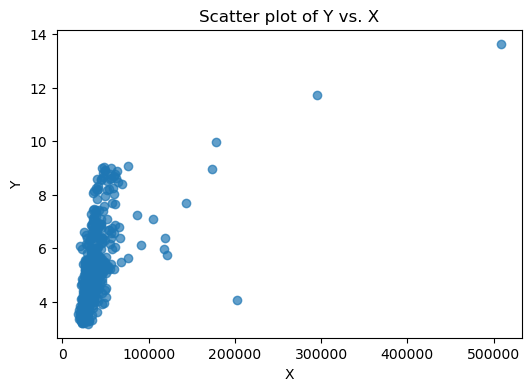

In [23]:

plt.figure(figsize=(6,4))
plt.scatter(df['initial_claims'], df['Unemployment Rate'], alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of Y vs. X')
plt.show()

In [24]:
import statsmodels.api as sm

X_sm = sm.add_constant(df['initial_claims'])       # add intercept
model = sm.OLS(df['Unemployment Rate'], X_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Unemployment Rate   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     184.6
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           1.60e-35
Time:                        11:31:49   Log-Likelihood:                -744.52
No. Observations:                 456   AIC:                             1493.
Df Residuals:                     454   BIC:                             1501.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.3462      0.094     46.

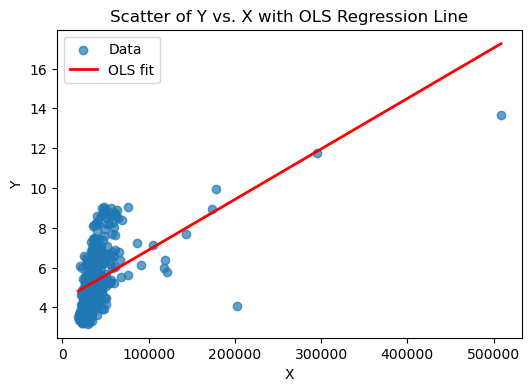

In [25]:
plt.figure(figsize=(6,4))
plt.scatter(df['initial_claims'], df['Unemployment Rate'], alpha=0.7, label='Data')
# Create a smooth line over the range of X
x_vals = np.linspace(df['initial_claims'].min(), df['initial_claims'].max(), 100)
y_vals = model.params['const'] + model.params['initial_claims'] * x_vals
plt.plot(x_vals, y_vals, color='red', lw=2, label='OLS fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter of Y vs. X with OLS Regression Line')
plt.legend()
plt.show()

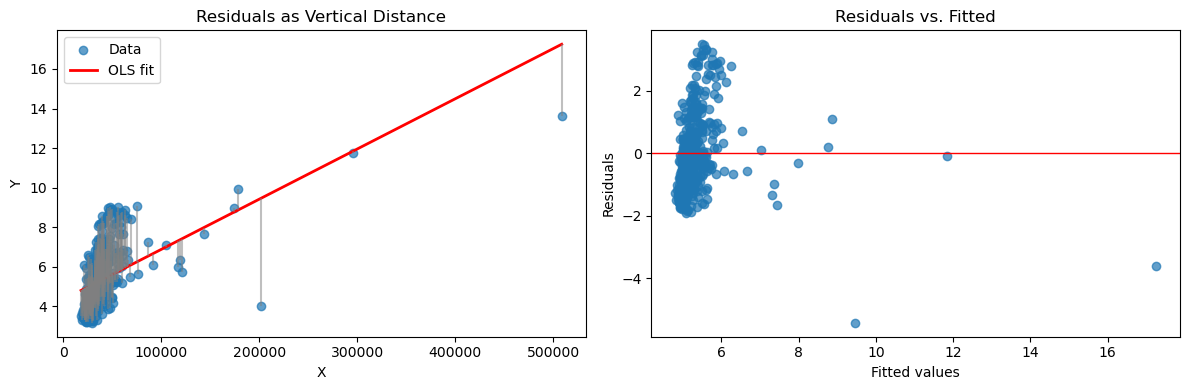

In [26]:
# visualize residuals as vertical distances and residuals vs. fitted
import numpy as np
import matplotlib.pyplot as plt

# Recompute the regression line for plotting
x_vals = np.linspace(df['initial_claims'].min(), df['initial_claims'].max(), 100)
y_vals = model.params['const'] + model.params['initial_claims'] * x_vals

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Panel 1: residuals as vertical distances
axes[0].scatter(df['initial_claims'], df['Unemployment Rate'], alpha=0.7, label='Data')
axes[0].plot(x_vals, y_vals, color='red', lw=2, label='OLS fit')
for xi, yi, fi in zip(df['initial_claims'], df['Unemployment Rate'], model.fittedvalues):
    axes[0].vlines(xi, yi, fi, color='gray', alpha=0.5)
axes[0].set_title('Residuals as Vertical Distance')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].legend()

# Panel 2: classic residuals vs. fitted plot
axes[1].scatter(model.fittedvalues, model.resid, alpha=0.7)
axes[1].axhline(0, color='red', lw=1)
axes[1].set_title('Residuals vs. Fitted')
axes[1].set_xlabel('Fitted values')
axes[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()